# 

In [591]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
import os

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.figure_factory as ff

import re
from tqdm import tqdm

#nltk
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer


import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import pyLDAvis
pyLDAvis.enable_notebook()

In [592]:

    
with open('before_war_cleaned.pkl', 'rb') as f:
    before_war = pickle.load(f)
    print(before_war.shape)
with open('war_and_after_cleaned.pkl', 'rb') as f:
    war_and_after = pickle.load(f)
    print(war_and_after.shape)
    
with open('before_war_vect.pkl', 'rb') as f:
    before_war_vect = pickle.load(f)
with open('war_and_after_vect.pkl', 'rb') as f:
    war_and_after_vect = pickle.load(f)

with open('before_war_sample.pkl', 'rb') as f:
    before_war_sample = pickle.load(f)
with open('war_and_after_sample.pkl', 'rb') as f:
    war_and_after_sample = pickle.load(f)

with open('before_war_tfidf.pkl', 'rb') as f:
    before_war_tfidf = pickle.load(f)
with open('war_and_after_tfidf.pkl', 'rb') as f:
    war_and_after_tfidf = pickle.load(f)

#get the LDA models for before and after
with open('before_war_lda.pkl', 'rb') as f:
    before_war_lda = pickle.load(f)
with open('war_and_after_lda.pkl', 'rb') as f:
    war_and_after_lda = pickle.load(f)


(835142, 5)
(8268526, 5)


In [531]:
# war_and_after.reset_index(drop=True, inplace=True)


6880054    tweet please russian army looter stole five sh...
5158431    unbeatable symbol european solidarity humanity...
4160604     russia ukraine captured ru tai fun k rap vehicle
2700668    ukraine nf z full segment fly zone debate nuan...
6049216    destroyed russia n convoy near tros ty net eas...
                                 ...                        
6312579    banality morrison morrison news ukraine russia...
5553361    russian force started practicing captured n la...
4825524    japan restriction japan self defense force org...
4815403    shame leroy merlin auch stop supporting put wa...
5224637    ukraine earlier today ukrainian force stuck kh...
Name: cleaned_text, Length: 1240279, dtype: object

In [593]:
with open('before_war_sample.pkl', 'rb') as f:
    before_war_sample = pickle.load(f)
with open('war_and_after_sample.pkl', 'rb') as f:
    war_and_after_sample = pickle.load(f)


# Before War

before_war_vect and war_and_after_vect tokenizes the text data and counts the occurrences of each token. Matrix is then created where rows are the documents and the columns are the tokens/terms. Each value is the count of each term in the document. They convert the text documents into numerical feature vectors, where each feature represents an ngram in the vocabulary

The before_war_tfidf and war_and_after_tfidf is basically a doc-term matrix. Each row represents a document, the column represents the unique ngram in the cleaned_text column, and the values of the matrix represent the importance of eaach term in the docment. 

ie. sample documents:
documents = [
    "This is the first document."
    "This document is the second document."
    "And this is the third one."
    "Is this the first documnet?"
]

vectorizer = CountVectorizer()
feature_names = vectorizer.get_feature_names_out()
X = vectorizer.fit_transform(documents)
print(feature_names)
print(X.toarray())

Output:
 feature_names = ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

tf-idf:
[[0 1 1 1 0 0 1 0 1]
[0 2 0 1 0 1 1 0 1]
[1 0 0 1 1 0 1 1 1]
[0 1 1 1 0 0 1 0 1]] 

You can get vocabulary by using .get_feature_names_out() method to return a list of all n-grams in the vocabulary. 
#all ngrams in before_war_sample['cleaned_text'] = vocab_before_war

Obtained from: https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

In [534]:

before_war_vect = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.85,
                                min_df = 5,
                                ngram_range=(2,4))

before_war_tfidf = before_war_vect.fit_transform(before_war_sample['cleaned_text'])
print(before_war_tfidf.shape)

war_and_after_vect = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.85,
                                min_df = 5,
                                ngram_range=(2,4))

war_and_after_tfidf = war_and_after_vect.fit_transform(war_and_after_sample['cleaned_text'])
print(war_and_after_tfidf.shape)

# with open('before_war_vect.pkl', 'wb') as f:
#      pickle.dump(before_war_vect, f)
with open('war_and_after_vect.pkl', 'wb') as f:
     pickle.dump(war_and_after_vect, f)
with open('war_and_after_tfidf.pkl', 'wb') as f:
     pickle.dump(war_and_after_tfidf, f)

(1240279, 5000)


## create and visualize LDA

In [535]:
# with open('before_war_tfidf.pkl', 'wb') as f:
#      pickle.dump(before_war_tfidf, f)

with open('war_and_after_tfidf.pkl', 'wb') as f:
     pickle.dump(before_war_tfidf, f)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#seems to be around max_iter 110
before_war_lda = LatentDirichletAllocation(n_components=9,
                                   max_iter=80,
                                   learning_method='online',
                                   random_state = 42)

before_war_lda.fit(before_war_tfidf)

In [ ]:
import pyLDAvis.lda_model


#at max_iter = 80, topics = 9
vocab_before_war = list(before_war_vect.get_feature_names_out())
#Read pickled after_war_LDAs
visual = pyLDAvis.lda_model.prepare(before_war_lda, before_war_tfidf, before_war_vect, vocab=vocab_before_war )
visual

In [6]:
n_top_words = 80
tf_feature_names = before_war_vect.get_feature_names_out()

topics = dict()
for topic_idx, topic in enumerate(before_war_lda.components_):
    topics[topic_idx] = [tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print("Topic #%d:" % (topic_idx+1))
    print(" | ".join([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #1:
russia ukraine | ukraine russia | russia border | ukraine border | ukraine war | stand ukraine | ukraine ukraine | invade ukraine | ukraine crisis | ukraine conflict | ukraine invasion | president biden | going invade | russia ukraine border | white house | border nato | russia going | russian ukraine | false flag | troop russia | ukraine russia border | russia nato | russia russia | tension russia | russia crisis | troop massed | going invade ukraine | ukraine russia crisis | war game | russia going invade | nato want | breaking news | ukraine military | live update | troop tank | youtube com | ukraine russia ukraine | russian troop massed | deploying troop | com watch | military drill | russia going invade ukraine | ukraine border nato | border ukraine russia | conflict ukraine | youtube com watch | want russia | ukraine going | massed ukraine | situation ukraine | conflict russia | eastern flank | troop ukraine russia | russia mass | year ago | russia said | russia continu

In [ ]:

n_top_words = 150
tf_feature_names = before_war_vect.get_feature_names_out()

topics = dict()
for topic_idx, topic in enumerate(before_war_lda2.components_):
    topics[topic_idx] = [tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print("Topic #%d:" % (topic_idx+1))
    print(" | ".join([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

## Experiment with 3-4 ngrams

In [42]:
### set ngrams to 3-4
before_war_vect_updated = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.85,
                                min_df = 5,
                                ngram_range=(3,4))
before_war_tfidf_updated = before_war_vect_updated.fit_transform(before_war_sample['cleaned_text'])
print(before_war_tfidf_updated.shape)

(173585, 5000)


LatentDirichletAllocation(learning_method='online', max_iter=100,
                          n_components=12, random_state=42)

In [77]:
from sklearn.decomposition import LatentDirichletAllocation

before_war_lda_updated = LatentDirichletAllocation(n_components=6,
                                   max_iter=160,
                                   learning_method='online',
                                   random_state = 42)

before_war_lda_updated.fit(before_war_tfidf_updated)

LatentDirichletAllocation(learning_method='online', max_iter=160,
                          n_components=6, random_state=42)

In [78]:
import pyLDAvis.lda_model
#at max_iter = 200, n_components = 12
vocab_before_war_updated = list(before_war_vect_updated.get_feature_names_out())
#Read pickled after_war_LDAs
visual = pyLDAvis.lda_model.prepare(before_war_lda_updated, before_war_tfidf_updated, before_war_vect_updated, vocab=vocab_before_war_updated )
visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.333486 -0.169181       1        1  17.699342
0     -0.211943 -0.138695       2        1  17.426413
3      0.050701  0.386571       3        1  16.653187
2      0.087889 -0.121507       4        1  16.491708
5     -0.003601  0.114999       5        1  15.990217
4     -0.256532 -0.072187       6        1  15.739133, topic_info=                             Term          Freq         Total Category  \
4076         troop ukraine border  10856.000000  10856.000000  Default   
2722        russia invade ukraine   5930.000000   5930.000000  Default   
3263        russian troop ukraine   4848.000000   4848.000000  Default   
3812         troop border ukraine   4477.000000   4477.000000  Default   
2013          near ukraine border   3199.000000   3199.000000  Default   
...                           ...           ...           ...      ...   
128    amid fear russian invasion    415.586766    416.407649   Topic6   
235                  bbc com news    413.663512    414.486464   Topic6   
548         buildup russian troop    407.540300    408.366423   Topic6   
3952  troop massed ukraine border    394.698862    395.519460   Topic6   
4854           war ukraine russia    392.228345    393.051576   Topic6   

      logprob  loglift  
4076  30.0000  30.0000  
2722  29.0000  29.0000  
3263  28.0000  28.0000  
3812  27.0000  27.0000  
2013  26.0000  26.0000  
...       ...      ...  
128   -5.4159   1.8470  
235   -5.4205   1.8470  
548   -5.4354   1.8470  
3952  -5.4675   1.8469  
4854  -5.4737   1.8469  

[212 rows x 6 columns], token_table=      Topic      Freq                        Term
term                                             
127       6  0.998743           amid fear russian
128       6  0.999021  amid fear russian invasion
180       2  0.999046          apnews com article
219       3  0.998542     backhand index pointing
235       6  0.998826                bbc com news
...     ...       ...                         ...
4850      4  0.999088            war ukraine nato
4854      6  0.997325          war ukraine russia
4901      4  0.997316    washingtonpost com world
4979      5  0.998940             wsj com article
4998      2  0.999404           youtube com watch

[183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 6, 5])

In [80]:
#  with open('war_and_after_sample2.pkl', 'wb') as f:
#     pickle.dump(war_and_after_sample, f)
with open('war_and_after_sample2.pkl', 'rb') as f:
    war_and_after_sample = pickle.load(f)
print("war_and_after_sample: ", war_and_after_sample.shape)

war_and_after_sample:  (264672, 6)


# War and After

In [538]:
war_and_after_lda = LatentDirichletAllocation(n_components=9,
                                   max_iter=100,
                                   learning_method='online',
                                   random_state = 42)


war_and_after_lda.fit(war_and_after_tfidf)

LatentDirichletAllocation(learning_method='online', max_iter=100,
                          n_components=8, random_state=42)

In [ ]:
# war_and_after_vect.fit(war_and_after_sample['cleaned_text'])
vocab_war_and_after = list(war_and_after_vect.get_feature_names_out())
#Read pickled after_war_LDAs

#max_iter = 160, n_components = 9
import pyLDAvis.lda_model

visual_after = pyLDAvis.lda_model.prepare(war_and_after_lda, war_and_after_tfidf, war_and_after_vect, vocab=vocab_war_and_after )
visual_after

In [540]:
with open('war_and_after_lda.pkl', 'wb') as f:
     pickle.dump(war_and_after_lda, f)

# with open('war_and_after_tfidf.pkl', 'wb') as f:
#      pickle.dump(war_and_after_tfidf, f)

# Get Toxicity Score

In [2]:
#read tf-idfs


In [416]:
pip install detoxify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [418]:
import detoxify
detox = detoxify.Detoxify('original')
#source: https://github.com/unitaryai/detoxify?tab=readme-ov-file

# Get all toxicity scores for each document and for each document in samples and for toxicity scores in clusters

In [21]:
'''
This method gets the toxicity score of each document by processing the entire text of each document and then 
calculates the toxicity score for each document. 
'''
def calculate_toxicity_scores_raw_txt(text):
    toxicity_scores = toxicity_model.predict(text)
    return toxicity_scores['toxicity']

# before_war_sample['toxicity_scores'] = before_war_sample['cleaned_text'].apply(calculate_toxicity_scores)
# war_and_after_sample['toxicity_scores'] = war_and_after_sample['cleaned_text'].apply(calculate_toxicity_scores)

   Topic                                               Text  Toxicity_Score
0      1  tigray genocide year old russia invasion day t...        0.006786
1      2  ukraine stop russian ukrainian ukrainian war r...        0.103350
2      3  stop russia stop russian kher son russian aggr...        0.241548
3      4  russia ukraine ukraine war war ukraine ukraine...        0.613289
4      5  stand ukraine ukraine russian war criminal rus...        0.536744
5      6  stand ukraine stop war war crime ukraine ukrai...        0.195999
6      7  ukraine russia ukraine ukraine russia war ukra...        0.400702


   Topic                                               Text  Toxicity_Score
0      1  russia ukraine ukraine russia russia border uk...        0.074079
1      2  invade ukraine ukraine nato russia invade russ...        0.163765
2      3  near ukraine ukraine border troop near nato tr...        0.000758
3      4  russian troop ukraine border troop ukraine tro...        0.002588
4      5  ukraine border troop ukraine troop ukraine bor...        0.006115
5      6  troop border border ukraine russian troop russ...        0.001901
6      7  russian invasion invasion ukraine news world u...        0.154240
7      8  twitter com war russia news com troop ukraine ...        0.001008
8      9  join nato border russia ukraine join nato ally...        0.179015


# Print and investigate toxicity scores

In [405]:
with open('before_war_total_topic_tox_scores.pkl', 'rb') as f:
    before_war_total_topic_tox_scores = pickle.load(f)

with open('war_and_after_total_topic_tox_scores.pkl', 'rb') as f:
    war_and_after_total_topic_tox_scores = pickle.load(f)


Meeting for 4PM on April 2nd through Columbia. 
1. Look into detoxify's methods -> see if it calculates the total or average toxicity scores. 
2. Get toxicity scores for every term or trigram in vocabulary -> all ngrams 
 -> get toxicity scores for all ngrams in before and after war
3. For each topic, get the maximum, min and average toxicity score for before and after.


Model:
Given all the words and the toxicity scores for before and after, try to predict the toxicity scores for after war using before. 
    -> use bag of words model for before war
linear regressor -> can I predict the toxicity score given some ngrams.
Train model on before to try to predict the after war toxicity score.

ie. Given ngrams from before the war, predict what the toxicity scores will be after 30 days. Compare the toxicity scores for each day after the war started. 

example of bag of words:

before war:
russia ukraine war -> 0.2 (toxicity score)
war russia --> 0.6
russia putin -> 0.1


after war:
kill putin today
russia falls
ukraine defend

Notice that some words in after_war doesn't exist in before_war. To fix this, we use the whole vocabulary from before and after to predict the toxicity scores. 
you would have one-hot embedding wit
vocab (will include ngrams from before and after). 
  russia   ukraine   war   putin  today  kill  falls  defend
[  1          1       1     0      0      0      0      0    ] ---> 0.255 (toxicity score)

[  1          0       1     0      0      0      0      0    ] ---> 0.6 (toxicity score)

[  1          0       0     1      0      0      0      0    ] ---> 0.099 (toxicity score)

              


Predict:
Given this input, what would the toxicity score be?
predict ([ 0,   0,  1    ]



1st day




Extra:
Maybe do deep learning?
Convultional neural network or recurrent neural network or BERT after we look at the linear regression. 

In [583]:
# def create_ngram_tox_dict(ngrams, batch_size=100):
#     """Calculate toxicity scores for a list of ngrams in batches."""
#     scores = []

#     for i in range(0, len(ngrams), batch_size):
#         batch = ngrams[i:i+batch_size]
#         batch_array = np.array(batch)
#         # Convert numpy array to a list
#         batch_list = batch_array.tolist()
#         results = detox.predict(batch_list)
#         scores.extend(results['toxicity'])  # Assuming 'toxicity' is the key of interest

#     return scores

# # Example usage
# before_war_ngrams = before_war_vect.get_feature_names_out()
# after_war_ngrams = war_and_after_vect.get_feature_names_out()

# before_war_tox_scores = create_ngram_tox_dict(before_war_ngrams)
# war_and_after_tox_scores = create_ngram_tox_dict(after_war_ngrams)

# # Mapping ngrams to their scores
# before_war_ngram_tox_dict = dict(zip(before_war_ngrams, before_war_tox_scores))


# war_and_after_ngram_tox_dict = dict(zip(after_war_ngrams, war_and_after_tox_scores))


In [587]:

with open('before_war_ngram_tox_dict.pkl', 'wb') as f:
     pickle.dump(before_war_ngram_tox_dict, f)
with open('war_and_after_ngram_tox_dict.pkl', 'wb') as f:
     pickle.dump(war_and_after_ngram_tox_dict, f)

# Get min, average, and max toxicity scores for each topic in before and after war
#Do you want sum of all toxicity scores or toxicity score of all ngrams??

In [277]:
#Belo

before_war_topics_all_ngrams = dict()
before_feature_names = before_war_vect.get_feature_names_out()
for topic_idx, topic in enumerate(before_war_lda.components_):
    before_war_topics_all_ngrams[topic_idx] = [before_feature_names[i] for i in topic.argsort()]

after_war_topics_all_ngrams = dict()
after_war_feature_names = war_and_after_vect.get_feature_names_out()
for topic_idx, topic in enumerate(war_and_after_lda.components_):
    after_war_topics_all_ngrams[topic_idx] = [after_war_feature_names[i] for i in topic.argsort()]

def calculate_cluster_toxicity_stats(topic_ngrams, ngram_tox_scores):
    # Initialize variables to store toxicity stats for the cluster
    min_toxicity = np.inf
    max_toxicity = -np.inf
    total_toxicity = 0
    ngram_count = 0

    #have one list of all toxicity scores, then extract min and max from them. 
    
    # Iterate over each ngram in the cluster
    for ngram in topic_ngrams:
        # Check if the ngram exists in the toxicity scores dictionary
        if ngram in ngram_tox_scores:
            # Get the toxicity scores associated with the ngram
            toxicity_scores = ngram_tox_scores[ngram]
            
            # Update toxicity stats for the cluster
            min_toxicity = min(min_toxicity, min(toxicity_scores))
            max_toxicity = max(max_toxicity, max(toxicity_scores))
            total_toxicity += sum(toxicity_scores)
            ngram_count += len(toxicity_scores)
    
    # Calculate average toxicity
    if ngram_count > 0:
        average_toxicity = total_toxicity / ngram_count
    else:
        average_toxicity = 0
    
    return min_toxicity, max_toxicity, average_toxicity, ngram_count

# Iterate over each cluster in before_war
before_war_cluster_stats = {}
for topic, ngrams in before_war_topics_all_ngrams.items():
    min_toxicity, max_toxicity, average_toxicity, ngram_count = calculate_cluster_toxicity_stats(ngrams, before_war_ngram_tox_scores)
    before_war_cluster_stats[topic] = {
        'min_toxicity': min_toxicity,
        'max_toxicity': max_toxicity,
        'average_toxicity': average_toxicity,
        'ngram_count': ngram_count
    }

# Iterate over each cluster in after_war
after_war_cluster_stats = {}
for topic, ngrams in after_war_topics_all_ngrams.items():
    min_toxicity, max_toxicity, average_toxicity, ngram_count = calculate_cluster_toxicity_stats(ngrams, war_and_after_ngram_tox_scores)
    after_war_cluster_stats[topic] = {
        'min_toxicity': min_toxicity,
        'max_toxicity': max_toxicity,
        'average_toxicity': average_toxicity,
        'ngram_count': ngram_count
    }


# for index, row in before_war_total_topic_tox_scores.iterrows():
#     topic_index = row['Topic'] - 1  # Adjusting index to match zero-based indexing
#     total_toxicity_score = row['Total_Toxicity_Score']
#     before_war_cluster_stats[topic_index]['total_toxicity'] = total_toxicity_score

# for index, row in war_and_after_total_topic_tox_scores.iterrows():
#     topic_index = row['Topic'] - 1  # Adjusting index to match zero-based indexing
#     total_toxicity_score = row['Total_Toxicity_Score']
#     after_war_cluster_stats[topic_index]['total_toxicity'] = total_toxicity_score

with open('before_war_cluster_stats.pkl', 'wb') as f:
     pickle.dump(before_war_cluster_stats, f)
with open('war_and_after_cluster_stats.pkl', 'wb') as f:
     pickle.dump(after_war_cluster_stats, f)


5000

Index(['Topic', 'Text', 'Total_Toxicity_Score'], dtype='object')

# Try to use before_war toxicity scores to predict toxicity scores for after war

Given all the words and the toxicity scores for before and after, try to predict the toxicity scores for after war using before. 
    -> use bag of words model for before war
linear regressor -> can I predict the toxicity score given some ngrams.
Train model on before to try to predict the after war toxicity score.

ie. Given ngrams from before the war, predict what the toxicity scores will be after 30 days. Compare the toxicity scores for each day after the war started. 

example of bag of words:

before war:
russia ukraine war -> 0.2 (toxicity score)
war russia --> 0.6
russia putin -> 0.1


after war:
kill putin today
russia falls
ukraine defend

Notice that some words in after_war doesn't exist in before_war. To fix this, we use the whole vocabulary from before and after to predict the toxicity scores. 
you would have one-hot embedding wit
vocab (will include ngrams from before and after). 
  russia   ukraine   war   putin  today  kill  falls  defend
[  1          1       1     0      0      0      0      0    ] ---> 0.255 (toxicity score)

[  1          0       1     0      0      0      0      0    ] ---> 0.6 (toxicity score)

[  1          0       0     1      0      0      0      0    ] ---> 0.099 (toxicity score)

              


Predict:
Given this input, what would the toxicity score be?
predict ([ 0,   0,  1    ]

In [415]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
with open('before_war_ngrams.pkl', 'rb') as f:
    before_war_ngrams = pickle.load(f)

# before_war_ngrams, before_war_toxicity_scores = before_war_ngram_tox_scores.keys(), before_war_ngram_tox_scores.values()
# after_war_ngrams, after_war_toxicity_scores = war_and_after_ngram_tox_scores.keys(), war_and_after_ngram_tox_scores.values()

# print(before_war_ngram_tox_scores.shape)
# print(type(before_war_tfidf))
# print(type(before_war_ngrams))



before_war_tfidf size: (174292, 5000)
  (0, 2026)	1
  (0, 86)	1
  (0, 2891)	1
  (0, 1604)	1
  (0, 1561)	1
  (0, 3027)	1
  (0, 2892)	1
  (1, 671)	1
  (1, 4588)	1
  (1, 4115)	1
  (1, 4589)	1
  (2, 4115)	1
  (2, 3838)	1
  (2, 1880)	1
  (2, 523)	1
  (3, 1698)	1
  (3, 3043)	1
  (3, 4240)	1
  (3, 616)	1
  (3, 162)	1
  (3, 2060)	1
  (3, 166)	1
  (3, 3105)	1
  (3, 551)	1
  (3, 4516)	1
  :	:
  (174286, 3194)	1
  (174286, 3792)	1
  (174287, 4173)	1
  (174287, 3441)	1
  (174287, 353)	1
  (174287, 354)	1
  (174287, 2614)	1
  (174287, 2615)	1
  (174287, 4002)	1
  (174287, 4003)	1
  (174287, 4004)	1
  (174287, 3451)	1
  (174288, 4413)	1
  (174288, 4666)	1
  (174288, 2077)	1
  (174289, 4793)	1
  (174289, 4264)	2
  (174289, 2544)	1
  (174289, 1435)	1
  (174290, 4725)	1
  (174290, 4713)	1
  (174290, 1368)	1
  (174290, 4783)	1
  (174291, 3829)	1
  (174291, 1601)	1


In [565]:

from sklearn.linear_model import LinearRegression

'''
function gets toxicity score of a document by extracting each ngram, gets the toxicity score of said ngram, and then calculates the avg of all toxicity scores to act as doc tox score
'''
def calculate_doc_tox_scores(documents):
    vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_features=5000,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                ngram_range=(2,4))
    #will hold all toxicity_scores
    doc_tox_scores= [] 

    for doc in documents:
        #get ngrams in current document
        vectorizer.fit_transform([doc])
        ngrams_in_doc = vectorizer.get_feature_names_out()

        #list will store ngram's tox_score
        ngram_tox_scores = []

        for ngram in ngrams_in_doc:
            try:
                result = detox.predict(ngram)
                ngram_tox_scores.append(result['toxicity'])
            except Exception as e:
                print(f"Error predicting toxicity for '{ngram}': {e}")

        #get avg toxicity score for ngrams in doc
        if ngram_tox_scores:
            avg_score = np.mean(ngram_tox_scores)
        else:
            avg_score = 0
        doc_tox_scores.append(avg_score)
    return np.array(doc_tox_scores)
    


#get raw text for detoxify library
before_war_docs = before_war_sample['cleaned_text'].tolist()
war_and_after_docs = war_and_after_sample['cleaned_text'].tolist()

#will be y_train
before_war_doc_scores = calculate_doc_tox_scores(before_war_docs)
with open('before_war_doc_scores.pkl', 'wb') as f:
     pickle.dump(before_war_doc_scores, f)



In [566]:
#will be y_test
war_and_after_doc_scores = calculate_doc_tox_scores(war_and_after_docs)
with open('war_and_after_doc_scores.pkl', 'wb') as f:
     pickle.dump(war_and_after_doc_scores, f)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [560]:


x_train = before_war_tfidf
y_train = before_war_doc_scores

x_test = war_and_after_tfidf
y_test = war_and_after_doc_scores


model = LinearRegression()

#train model
model.fit(x_train, y_train)

x_test = war_and_after_tfidf
predicted_toxicity_scores = model.predict(x_test)
len(predicted_toxicity_scores)


array([], dtype=float64)

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

after_war_toxicity_scores = list(war_and_after_ngram_tox_dict.values())

# Calculate evaluation metrics
mse = mean_squared_error(after_war_toxicity_scores, predicted_toxicity_scores)
mae = mean_absolute_error(after_war_toxicity_scores, predicted_toxicity_scores)
r2 = r2_score(after_war_toxicity_scores, predicted_toxicity_scores)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.028382868268334555
Mean Absolute Error (MAE): 0.07759557199983905
R-squared (R2): -0.04089932244666317


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


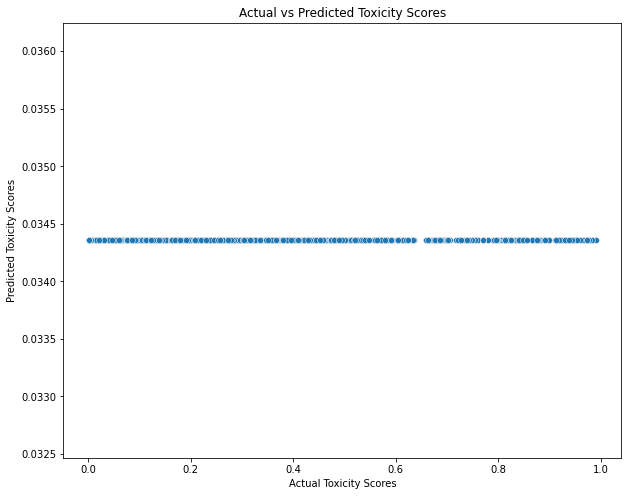

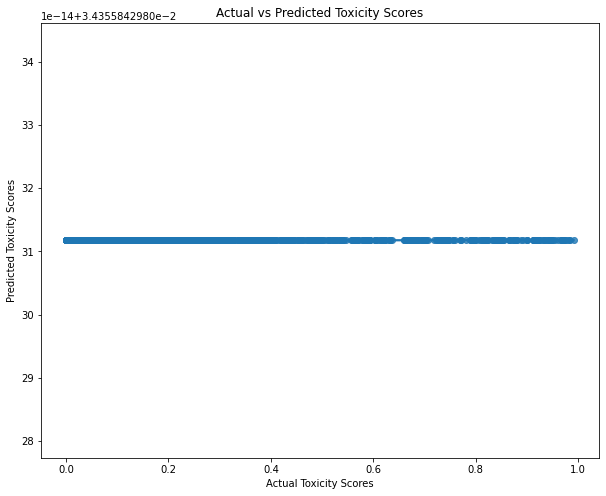

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure predicted_toxicity_scores is iterable
if isinstance(predicted_toxicity_scores, np.float64):
    predicted_toxicity_scores = [predicted_toxicity_scores]

# Flatten the lists of toxicity scores
after_war_toxicity_scores_flat = [score for sublist in after_war_toxicity_scores for score in sublist]
predicted_toxicity_scores_flat = predicted_toxicity_scores

# Create a DataFrame with actual and predicted toxicity scores
data = {'Actual': after_war_toxicity_scores_flat, 'Predicted': predicted_toxicity_scores_flat}
df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Actual', y='Predicted', data=df)
plt.title('Actual vs Predicted Toxicity Scores')
plt.xlabel('Actual Toxicity Scores')
plt.ylabel('Predicted Toxicity Scores')
plt.show()

# Regression plot
plt.figure(figsize=(10, 8))
plt.title('Actual vs Predicted Toxicity Scores')
plt.xlabel('Actual Toxicity Scores')
plt.ylabel('Predicted Toxicity Scores')
plt.show()


In [546]:
# # Convert the sparse TF-IDF matrix to a dense format
# dense_X_train_20 = X_train_20.todense()

# # Optional: Convert to a NumPy array for easier viewing/manipulation
# array_X_train_20 = np.array(dense_X_train_20)

# feature_names = before_war_vect.get_feature_names_out()

# # Convert the first document's TF-IDF scores to a dictionary mapping terms to scores
# doc_scores_dict = {feature_names[i]: array_X_train_20[0, i] for i in range(len(feature_names)) if array_X_train_20[0, i] != 0}

# # Print the dictionary
# print(doc_scores_dict)



['tweet please russian army looter stole five ship grain port rd yan sk shameful army world war woj na army russian ukraine looter put kyiv',
 'unbeatable symbol european solidarity humanity empathy pl give refugee ride leaving kyiv stand ukraine ukraine',
 'russia ukraine captured ru tai fun k rap vehicle',
 'ukraine nf z full segment fly zone debate nuanced seen discussed flown airspace conflict experience cao c operation responsible battle space de conflict ion uk j f hq key info via wi news',
 'destroyed russia n convoy near tros ty net east ukraine',
 'kiev fighting continues west well east movement rf mechanized column indicates definite goal russia n force surround amp blockade kiev completely ukraine ian force continue putting fierce resistance cher ni gov blockaded',
 'russian shell landed residential building buch kyiv oblast ukraine',
 'people ukraine amp belarus suffer amp russia silenced amp detained theme wd important ever break bias stand strong amp work together gender 

In [553]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the TF-IDF features and toxicity scores of the first 20 documents
model.fit(x_train, y_train)

x_test = war_and_after_tfidf[:20]
predicted_toxicity_scores = model.predict(x_test)
len(predicted_toxicity_scores)


80

In [554]:
mse = mean_squared_error(test_scores, predicted_toxicity_scores)
mae = mean_absolute_error(test_scores, predicted_toxicity_scores)
r2 = r2_score(test_scores, predicted_toxicity_scores)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0066797375004224975
Mean Absolute Error (MAE): 0.05109934865726436
R-squared (R2): -0.23129248123056656


In [ ]:
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


# Define a function to train LDA models and calculate log-likelihood
def calculate_log_likelihood(data, min_topics, max_topics, step_size):
    log_likelihoods = []
    topic_range = range(min_topics, max_topics + step_size, step_size)
    
    # Wrap the loop with tqdm to display a progress bar
    for num_iter in tqdm(topic_range, desc='Calculating Log-Likelihoods'):
        lda_model = LatentDirichletAllocation(n_components=15, max_iter=num_iter, random_state=42)
        lda_model.fit(data)
        log_likelihood = lda_model.score(data)
        log_likelihoods.append(log_likelihood)
    
    return topic_range, log_likelihoods

# Calculate log-likelihoods
min_iter= 100
max_iter = 1000
step_size = 100
topic_range, log_likelihoods = calculate_log_likelihood(war_and_after_tfidf, min_iter, max_iter, step_size)

# Plot log-likelihoods
plt.plot(topic_range, log_likelihoods, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Number of Topics')
plt.grid(True)

In [ ]:
###war_and_after 
coherence_scores = []
passes_range = range(50, 100, 5)  # Adjust the range as needed

progress_bar = tqdm(total=len(passes_range), desc='Progress', position=0)
for passes in passes_range:
    print("entering")
    lda_model = LdaModel(corpus=war_and_after_corpora, id2word=war_and_after_dict, num_topics = 11, passes=passes, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=war_and_after_titles, dictionary=war_and_after_dict, coherence='c_v')
    print("check")
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    progress_bar.update(1)

progress_bar.close()

# You can then plot the coherence scores to see how they change with the number of passes
import matplotlib.pyplot as plt

plt.plot(range(50, 100, 5), coherence_scores)
plt.xlabel('Number of Passes')
plt.ylabel('Coherence Score')
plt.show()

In [ ]:
before_war_matrix = before_war_vect.fit_transform(before_war_sample['cleaned_text'])
war_and_after_matrix = war_and_after_vect.fit_transform(war_and_after_sample['cleaned_text'])
 
 
'''  more calculating toxicity scores.
function accepts two parameters:
ngrams: sparse matrix for transformed text data whererin (document#, feature/ngram)
feature_names: list of the features taken directly from vectorizer


Got some of syntax for function from ChatGPT. 
'''
def calculate_ngram_toxicity_scores(ngrams, feature_names):
    #get number of docs, and number of features from vectorizer
    num_docs, num_features = ngrams.shape
    #will store {ngram, toxicity_score)
    ngram_toxicity_scores = {}

    #iterate over each document in ngrams
    for i in range(num_docs):
        #within each document, iterate over each ngram/feature individually
        for j in range(num_features):
            #check if the current ngram is present in the document (if absent,ngrams[i,j] = 0)
            if ngrams[i, j] > 0:
                #obtain toxicity score for the ngram (feature)
                ngram = feature_names[j]
                toxicity_score = toxicity_model.predict(ngram)['toxicity']
                
                #store the toxicity score in the dictionary with the n-gram as key
                if ngram not in ngram_toxicity_scores:
                    ngram_toxicity_scores[ngram] = []
                ngram_toxicity_scores[ngram].append(toxicity_score)
        
    return ngram_toxicity_scores
###Get Toxicity scores for all ngrams in before and after war

#get the toxicity scores for all ngrams in the before_war df
#output = {ngram, toxicity_score for each ngram)
# before_war_feature_names = before_war_vect.get_feature_names_out()
# before_war_ngram_tox_scores = calculate_ngram_toxicity_scores(before_war_matrix, before_war_feature_names)

# before_war_ngram_tox_scores = {ngram: list(set(scores)) if isinstance(scores, list) else scores for ngram, scores in before_war_ngram_tox_scores.items()}
# with open('before_war_ngram_tox_scores.pkl', 'wb') as f:
#      pickle.dump(before_war_ngram_tox_scores, f)


#get the toxicity scores for all ngrams in the in war_and_after df
#output = {ngram, toxicity_score for each ngram)
war_and_after_feature_names = war_and_after_vect.get_feature_names_out()
war_and_after_ngram_tox_scores = calculate_ngram_toxicity_scores(war_and_after_matrix, war_and_after_feature_names)

war_and_after_ngram_tox_scores = {ngram: list(set(scores)) if isinstance(scores, list) else scores for ngram, scores in war_and_after_ngram_tox_scores.items()}

with open('war_and_after_ngram_tox_scores.pkl', 'wb') as f:
     pickle.dump(war_and_after_ngram_tox_scores, f)

'''
before_war_ngram_tox_scores and war_and_after_ngram_tox_scores are both dictionaries that contain
toxicity scores for each ngram. Each key-value pair represents an ngram(key): corresponding 
toxicity_score (value). 
'''


